# Stock Market Analysis and Visualization

Welcome to the Stock Market Analysis and Visualization project! This notebook aims to retrieve, analyze, and visualize historical stock price data for NVIDIA (NVDA), Advanced Micro Devices (AMD), and Apple Inc. (AAPL). We leverage the Alpha Vantage API to fetch the data and use Python libraries such as pandas, matplotlib, and plotly to process and visualize the information.

## Objectives
- Retrieve historical stock prices using the Alpha Vantage API.
- Calculate daily growth and identify significant growth days.
- Compare stock price trends among NVDA, AMD, and AAPL.
- Create interactive visualizations to explore the data.

## Libraries Used
- `alpha_vantage`: To fetch stock price data.
- `pandas`: For data manipulation and analysis.
- `matplotlib`: For static plotting.
- `plotly`: For interactive visualizations.

## Considerations
- **Environment**: This project is designed to run in Google Colab, which provides a free, cloud-based environment for machine learning and data analysis with Python.
- **API Key Management**: In Colab, we securely manage the Alpha Vantage API key using the built-in `userdata` feature. This allows us to store sensitive information like the API key and access it within the notebook using `userdata.get('ALPHA_VANTAGE_API_KEY')`. This method ensures that the API key is not hard-coded into the notebook, enhancing security.
- **Interactivity**: The use of Plotly within Colab enables the creation of interactive plots that can be shared or embedded in web pages, providing a dynamic way to present and explore the data.

# Setup Instructions

To run this notebook, you will need to install the following Python packages:

1. `alpha_vantage`: To install, run `!pip install alpha_vantage` in a notebook cell.
2. `pandas`: To install, run `!pip install pandas` in a notebook cell.
3. `matplotlib`: To install, run `!pip install matplotlib` in a notebook cell.
4. `plotly`: To install, run `!pip install plotly` in a notebook cell.

Ensure you have an API key from [Alpha Vantage](https://www.alphavantage.co/support/#api-key) to access the financial data.

In [64]:
!pip install alpha_vantage
!pip install pandas
!pip install matplotlib
!pip install plotly

# Managing Your Alpha Vantage API Key

To protect your API key, you can either set it as an environment variable or use Colab's built-in secret management feature. Here's how to do it using Colab's interface:

1. Get your Alpha Vantage API key here: https://www.alphavantage.co/support/#api-key
2. Click on `Secrets` in the Google Colab side bar.
3. Add a new secret named `ALPHA_VANTAGE_API_KEY` with your API key as the value.
4. Access the API key within your notebook using `userdata.get('ALPHA_VANTAGE_API_KEY')`.

In [65]:
from google.colab import userdata

api_key = userdata.get('ALPHA_VANTAGE_API_KEY')

# NVIDIA Analysis

## Fetching Stock Price Data

The `alpha_vantage` package is used to retrieve stock price data. We specify the desired time series data and output size (`'compact'` or `'full'`). The API returns a JSON response, which we convert to a pandas DataFrame for ease of analysis.

The data includes open, high, low, close prices, and volume for each trading day. We then preprocess this data by cleaning up the column names and converting the date column to a datetime object for better time series analysis.

In [66]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd

# Initialize TimeSeries object
ts = TimeSeries(key=api_key, output_format='pandas')

# Fetch daily Nvidia stock price data
nvidia_df, nvidia_meta_data = ts.get_daily(symbol='NVDA', outputsize='full')

# Display the first few rows
print("NVIDIA Data:")
print(nvidia_df.head())

NVIDIA Data:
            1. open  2. high  3. low  4. close    5. volume
date                                                       
2024-10-10   131.91   135.00  131.00    134.81  242311337.0
2024-10-09   134.11   134.52  131.38    132.65  246191612.0
2024-10-08   130.26   133.48  129.42    132.89  285722485.0
2024-10-07   124.99   130.64  124.95    127.72  346250233.0
2024-10-04   124.94   125.04  121.83    124.92  244465552.0


## Data Preprocessing

After fetching the data, we perform the following preprocessing steps:

- Rename columns for clarity.
- Convert the `'date'` column to pandas datetime format.

In [67]:
# Reset the index to make 'date' a column
nvidia_df.reset_index(inplace=True)

# Rename columns using the rename function
nvidia_df.rename(columns={
    'date': 'Date',
    '1. open': 'Open',
    '2. high': 'High',
    '3. low': 'Low',
    '4. close': 'Close',
    '5. volume': 'Volume'
}, inplace=True)

# Parse 'date' column into datetime format
nvidia_df['Date'] = pd.to_datetime(nvidia_df['Date'])

# Display the first few rows
print("NVIDIA Data:")
print(nvidia_df.head())

NVIDIA Data:
        Date    Open    High     Low   Close       Volume
0 2024-10-10  131.91  135.00  131.00  134.81  242311337.0
1 2024-10-09  134.11  134.52  131.38  132.65  246191612.0
2 2024-10-08  130.26  133.48  129.42  132.89  285722485.0
3 2024-10-07  124.99  130.64  124.95  127.72  346250233.0
4 2024-10-04  124.94  125.04  121.83  124.92  244465552.0


## Visualizing NVIDIA's Closing Stock Prices

To concentrate on the essential trend of NVIDIA's closing stock prices, we perform a targeted extraction of the `'Date'` and `'Close'` columns from the dataset.

We then pivot the `'Date'` column into the index position of the new DataFrame `date_df`, setting the stage for a time-series plot.

This preparatory step is followed by the generation of a line chart, simply titled `'Nvidia Stock Price'`, which cleanly illustrates the stock's closing price trajectory over time.

This focused approach provides a clear visual representation of NVIDIA's stock performance.

<Axes: title={'center': 'Nvidia Stock Price'}, xlabel='Date'>

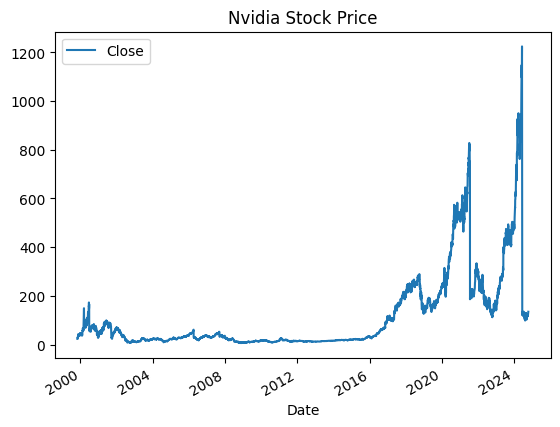

In [68]:
# Extract 'Date' and 'Close' columns
date_df = nvidia_df[['Date', 'Close']]

# Use 'Date' as the DataFrame index
date_df = date_df.set_index('Date')

# Plot closing prices against dates
date_df.plot(title='Nvidia Stock Price')

## Identifying Days with Greatest Stock Price Growth

In this analysis, we aim to pinpoint the days when NVIDIA's stock experienced the most significant positive change in value.

To achieve this, we first create a working copy of the original DataFrame, `nvidia_df`, naming it `nvidia_biggest_growth_df`. We then proceed to calculate the `'Growth'` of the stock for each trading day by subtracting the `'Open'` price from the `'Close'` price. This `'Growth'` figure represents the net change in the stock's price throughout the day.

After computing the daily growth, we sort `nvidia_biggest_growth_df` in descending order by the `'Growth'` column. This sorting operation brings the days with the largest increase in stock price to the forefront of our analysis.

We enhance the readability of the `'Growth'` figures by formatting them as US dollar amounts with two decimal places, providing a clear and consistent financial representation. Each growth value is prefixed with a dollar sign, reinforcing its monetary context.

To highlight the top performers, we display only the top five entries from `nvidia_biggest_growth_df` using the `.head(5)` method. This curated view allows for an immediate understanding of the most substantial daily gains, offering valuable insights into the stock's performance and potential market trends.

In [69]:
# Get the difference between `open` and `close` columns
nvidia_biggest_growth_df = nvidia_df.copy()
nvidia_biggest_growth_df['Growth'] = nvidia_biggest_growth_df['Close'] - nvidia_biggest_growth_df['Open']
nvidia_biggest_growth_df = nvidia_biggest_growth_df.sort_values('Growth', ascending=False)

# biggest_growth_df = biggest_growth_df[['date', 'growth']]
nvidia_biggest_growth_df['Growth'] = nvidia_biggest_growth_df['Growth'].apply(lambda x: f"${x:.2f}")
nvidia_biggest_growth_df.head(5)

,Date,Open,High,Low,Close,Volume,Growth
6184,2000-03-13,107.0000,150.0000,107.000,149.30,5031600.0,$42.30
88,2024-06-05,1183.7100,1224.4950,1174.680,1224.40,52840178.0,$40.69
115,2024-04-26,838.1800,883.3093,833.870,877.35,55101078.0,$39.17
147,2024-03-12,880.4900,919.6000,861.501,919.13,65437480.0,$38.64
116,2024-04-25,788.6801,833.2299,782.230,826.32,42464073.0,$37.64


## Biggest Daily Stock Price Declines

To conclude our growth analysis, we swiftly identify the days with the most significant stock price declines.

By calling `nvidia_biggest_growth_df.tail(5)`, we retrieve the five entries with the largest negative `'Growth'` values, revealing the most substantial daily decreases in NVIDIA's stock price.

In [70]:
# Display biggest decline
nvidia_biggest_growth_df.tail(5)

,Date,Open,High,Low,Close,Volume,Growth
117,2024-04-24,839.500,840.8200,791.83,796.77,51220753.0,$-42.73
122,2024-04-17,883.400,887.7500,839.50,840.35,49539951.0,$-43.05
131,2024-04-04,904.060,906.3399,858.80,859.05,42886990.0,$-45.01
120,2024-04-19,831.500,843.2400,756.06,762.00,87519800.0,$-69.50
149,2024-03-08,951.379,974.0000,865.06,875.28,114226906.0,$-76.10


# Expanding the Analysis to AMD and Apple

After a detailed examination of NVIDIA's stock performance, we broaden our analysis to include two additional tech giants: Advanced Micro Devices (AMD) and Apple Inc. (AAPL). This comparative approach allows us to observe and contrast the stock price trends of all three companies, providing a more comprehensive view of the tech sector's market dynamics.

## AMD Stock Price Data Retrieval

First, we retrieve AMD's historical stock price data using the Alpha Vantage API. We store the fetched data in a DataFrame named `amd_df`.


In [71]:
# Fetch AMD daily stock price data
amd_df, amd_meta_data = ts.get_daily(symbol='AMD', outputsize='full')

# Display the first few rows
print("AMD Data:")
print(amd_df.head())

AMD Data:
            1. open  2. high  3. low  4. close   5. volume
date                                                      
2024-10-10  169.760   172.01  162.00    164.18  75113590.0
2024-10-09  174.050   174.05  169.55    171.02  33890735.0
2024-10-08  171.750   173.60  170.00    172.80  34730152.0
2024-10-07  171.080   172.41  168.21    170.97  38379930.0
2024-10-04  166.533   171.21  164.42    170.90  44640296.0


## AMD Stock Price Data Retrieval and Preprocessing

The historical stock price data for AMD is retrieved through the Alpha Vantage API and organized into a DataFrame named `amd_df`.

We follow the same preprocessing steps as with NVIDIA's data, including column renaming, datetime conversion, and filtering out non-trading days.

This ensures consistency in our analysis and enables accurate cross-company comparisons.

In [72]:
# Reset the index to make 'date' a column
amd_df.reset_index(inplace=True)

# Rename columns for clarity
amd_df.rename(columns={
    'date': 'Date',
    '1. open': 'Open',
    '2. high': 'High',
    '3. low': 'Low',
    '4. close': 'Close',
    '5. volume': 'Volume'
}, inplace=True)

# Convert 'date' to datetime and set as index
amd_df['Date'] = pd.to_datetime(amd_df['Date'])
amd_df.set_index('Date', inplace=True)

# Display the first few rows of the DataFrame
print("AMD Data:")
print(amd_df.head())

AMD Data:
               Open    High     Low   Close      Volume
Date                                                   
2024-10-10  169.760  172.01  162.00  164.18  75113590.0
2024-10-09  174.050  174.05  169.55  171.02  33890735.0
2024-10-08  171.750  173.60  170.00  172.80  34730152.0
2024-10-07  171.080  172.41  168.21  170.97  38379930.0
2024-10-04  166.533  171.21  164.42  170.90  44640296.0


## AMD Stock Price Visualization
With the data preprocessed, we plot AMD's closing stock prices over time. This visualization helps us understand the company's stock performance trends.

<Axes: title={'center': 'AMD Stock Price'}, xlabel='Date'>

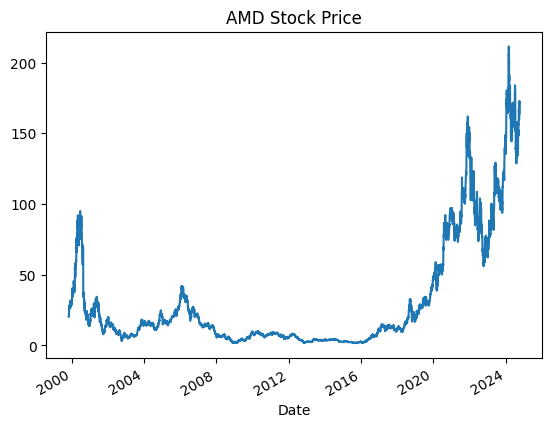

In [73]:
# Plot AMD's closing stock prices
amd_df['Close'].plot(title='AMD Stock Price')

## Apple Stock Price Data Retrieval

Next, we fetch Apple's historical stock price data and store it in a DataFrame named `apple_df`.

In [74]:
# Fetch Apple's historical stock price data
apple_df, apple_meta_data = ts.get_daily(symbol='AAPL', outputsize='full')

# Display the first few rows
print("APPLE Data:")
print(apple_df.head())

APPLE Data:
            1. open  2. high  3. low  4. close   5. volume
date                                                      
2024-10-10   227.78   229.50  227.17    229.04  28183544.0
2024-10-09   225.23   229.75  224.83    229.54  33591091.0
2024-10-08   224.30   225.98  223.25    225.77  31855693.0
2024-10-07   224.50   225.69  221.33    221.69  39505354.0
2024-10-04   227.90   228.00  224.13    226.80  37345098.0


## Apple Data Preprocessing
We apply the same preprocessing steps to the Apple dataset to prepare it for subsequent analysis.

In [75]:
# Reset the index to make 'date' a column
apple_df.reset_index(inplace=True)

# Rename columns for clarity
apple_df.rename(columns={
    'date': 'Date',
    '1. open': 'Open',
    '2. high': 'High',
    '3. low': 'Low',
    '4. close': 'Close',
    '5. volume': 'Volume'
}, inplace=True)

# Convert 'date' to datetime and set as index
apple_df['Date'] = pd.to_datetime(apple_df['Date'])
apple_df.set_index('Date', inplace=True)

# Display the first few rows of the DataFrame
print("APPLE Data:")
print(apple_df.head())

APPLE Data:
              Open    High     Low   Close      Volume
Date                                                  
2024-10-10  227.78  229.50  227.17  229.04  28183544.0
2024-10-09  225.23  229.75  224.83  229.54  33591091.0
2024-10-08  224.30  225.98  223.25  225.77  31855693.0
2024-10-07  224.50  225.69  221.33  221.69  39505354.0
2024-10-04  227.90  228.00  224.13  226.80  37345098.0


## Apple Stock Price Visualization
Now we plot the closing stock prices over time for Apple.

<Axes: title={'center': 'Apple Stock Price'}, xlabel='Date'>

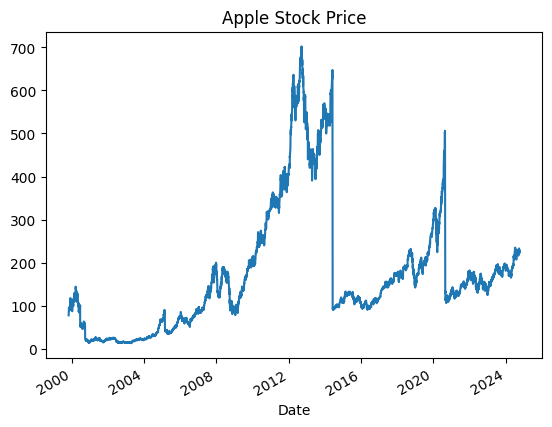

In [76]:
# Plot closing stock prices for Apple
apple_df['Close'].plot(title='Apple Stock Price')

## Visualizing and Comparing Stock Price Trends

With the datasets for NVIDIA, AMD, and Apple meticulously prepared, we proceed to create a comparative visualization of their closing stock prices. This visualization takes the form of a line chart, which serves as a powerful tool to identify patterns, trends, and correlations between the stock prices of these tech industry leaders.

In [77]:
# Create an empty dictionary to hold the data
stock_data = {}

# Store the data in the dictionary
stock_data['NVDA'] = nvidia_df
stock_data['AMD'] = amd_df
stock_data['AAPL'] = apple_df

## Stock Price Comparison Chart

Shows the historical closing prices of NVDA, AMD, and AAPL on a single plot for easy comparison.

In [78]:
# Before plotting, reset the index so that 'Date' is available as a column
apple_df.reset_index(inplace=True)
nvidia_df.reset_index(inplace=True)
amd_df.reset_index(inplace=True)

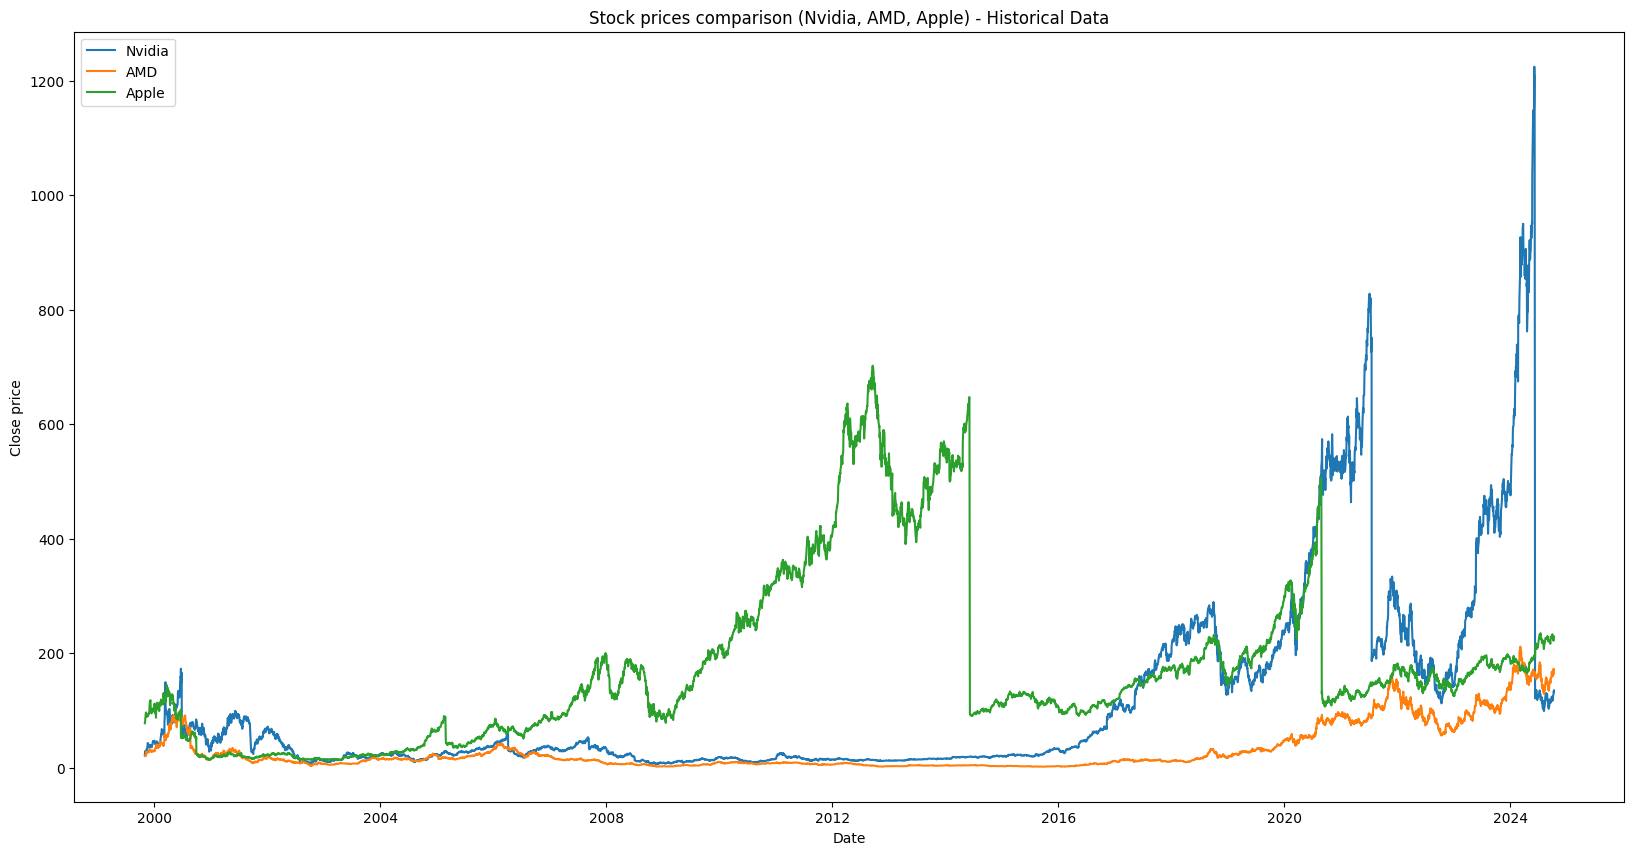

In [79]:
import matplotlib.pyplot as plt

# Assuming 'nvidia_df', 'amd_df', and 'apple_df' have been prepared and filtered appropriately

# Create a new figure with specified dimensions
plt.figure(figsize=(20, 10))

# Plot the closing prices for each stock against their respective dates
plt.plot(nvidia_df['Date'], nvidia_df['Close'], label='Nvidia')
plt.plot(amd_df['Date'], amd_df['Close'], label='AMD')
plt.plot(apple_df['Date'], apple_df['Close'], label='Apple')

# Add a title, labels, and a legend to the chart
plt.title('Stock prices comparison (Nvidia, AMD, Apple) - Historical Data')
plt.xlabel('Date')
plt.ylabel('Close price')
plt.legend()

# Display the plot
plt.show()

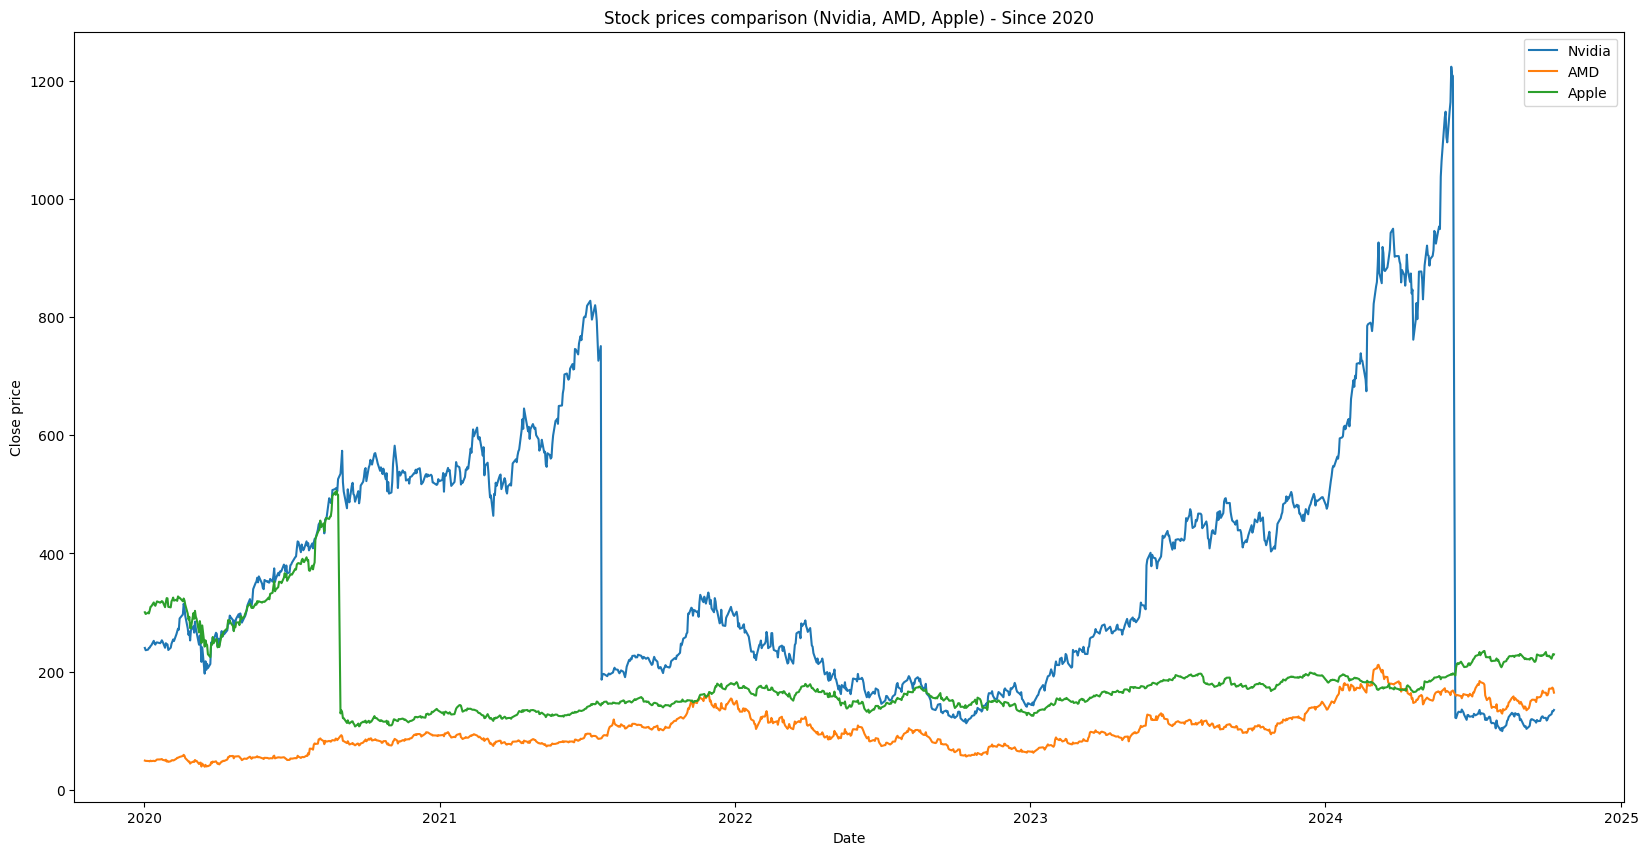

In [80]:
# Create a new figure with specified dimensions
plt.figure(figsize=(20, 10))

# Filter by date
nvidia_filtered_df = nvidia_df[nvidia_df['Date'] >= '2020-01-01']
amd_filtered_df = amd_df[amd_df['Date'] >= '2020-01-01']
apple_filtered_df = apple_df[apple_df['Date'] >= '2020-01-01']

# Plot the closing prices for each stock against their respective dates
plt.plot(nvidia_filtered_df['Date'], nvidia_filtered_df['Close'], label='Nvidia')
plt.plot(amd_filtered_df['Date'], amd_filtered_df['Close'], label='AMD')
plt.plot(apple_filtered_df['Date'], apple_filtered_df['Close'], label='Apple')

# Add a title, labels, and a legend to the chart
plt.title('Stock prices comparison (Nvidia, AMD, Apple) - Since 2020')
plt.xlabel('Date')
plt.ylabel('Close price')
plt.legend()

# Display the plot
plt.show()

## Interactive Stock Price Chart

The Plotly-powered interactive chart includes:

- Hover information for detailed price insights on specific dates.
- A date range slider to focus on particular time intervals.
- Buttons to quickly switch between "All time", "Last year", and "Last month" views.

In [81]:
import datetime
import plotly.express as px

today = datetime.date.today()
first = today.replace(day=1)
last_month = first - datetime.timedelta(days=1)

# Create a Plotly figure for the interactive chart
fig = px.line(title='Stock prices comparison (Nvidia, AMD, Apple)')

# Add traces for each stock's closing prices
fig.add_scatter(x=nvidia_filtered_df['Date'], y=nvidia_filtered_df['Close'], mode='lines', name='Nvidia')
fig.add_scatter(x=amd_filtered_df['Date'], y=amd_filtered_df['Close'], mode='lines', name='AMD')
fig.add_scatter(x=apple_filtered_df['Date'], y=apple_filtered_df['Close'], mode='lines', name='Apple')

# Update the layout to show all data on hover and add a date range slider
fig.update_layout(hovermode="x unified")  # Show all data on hover
fig.update_layout(xaxis_rangeslider_visible=True) # Add date range slider

# Add date range buttons for quick time period selections
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(label="All time",
                     method="relayout",
                     args=["xaxis.range", [None, None]]),
                dict(label="Last year",
                     method="relayout",
                     args=["xaxis.range", ['2023-01-01', '2024-01-01']]),
                dict(label="Last month",
                     method="relayout",
                     args=["xaxis.range", [last_month.strftime("%Y-%m-01"), last_month.strftime("%Y-%m-%d")]]),
            ]),
            direction="down",
            showactive=True,
            xanchor="right",
            yanchor="top"
        ),
    ]
)

# Show the interactive chart
fig.show()

# Write the interactive chart as an HTML file
fig.write_html('./interactive_chart.html')

Click here to see the chart: https://danielmribeiro.github.io/stock-market-analysis-and-visualization/interactive_chart.html

## Biggest stock jumps in a day

The analysis of the biggest stock jumps provides valuable insights into market behavior. By correlating these jumps with known events such as product launches or financial announcements, we can better understand the factors influencing stock prices. This can be tied with a quick google to see what happened that day (for example, AI tool launched, GPU was announced etc.).

The results of this analysis are presented both in tabular form and through visualizations.

In [82]:
daily_nvidia_jumps_df = nvidia_df.copy(deep=True)
daily_amd_jumps_df = amd_df.copy(deep=True)
daily_apple_jumps_df = apple_df.copy(deep=True)

daily_nvidia_jumps_df['Jump'] = daily_nvidia_jumps_df['Close'] - daily_nvidia_jumps_df['Open']
daily_amd_jumps_df['Jump'] = daily_amd_jumps_df['Close'] - daily_amd_jumps_df['Open']
daily_apple_jumps_df['Jump'] = daily_apple_jumps_df['Close'] - daily_apple_jumps_df['Open']

daily_nvidia_jumps_df = daily_nvidia_jumps_df[daily_nvidia_jumps_df['Date'] >= '2015-01-01']
daily_amd_jumps_df = daily_amd_jumps_df[daily_amd_jumps_df['Date'] >= '2015-01-01']
daily_apple_jumps_df = daily_apple_jumps_df[daily_apple_jumps_df['Date'] >= '2015-01-01']

# Filter out the days with 0 jump
daily_nvidia_jumps_df = daily_nvidia_jumps_df[daily_nvidia_jumps_df['Jump'] != 0]
daily_amd_jumps_df = daily_amd_jumps_df[daily_amd_jumps_df['Jump'] != 0]
daily_apple_jumps_df = daily_apple_jumps_df[daily_apple_jumps_df['Jump'] != 0]

# Find and print biggest jumps (positive and negative)
print('Nvidia biggest jumps:')
print(daily_nvidia_jumps_df.nlargest(5, 'Jump'))
print('Nvidia biggest declines:')
print(daily_nvidia_jumps_df.nsmallest(5, 'Jump'))

print('AMD biggest jumps:')
print(daily_amd_jumps_df.nlargest(5, 'Jump'))
print('AMD biggest declines:')
print(daily_amd_jumps_df.nsmallest(5, 'Jump'))

print('Apple biggest jumps:')
print(daily_apple_jumps_df.nlargest(5, 'Jump'))
print('Apple biggest declines:')
print(daily_apple_jumps_df.nsmallest(5, 'Jump'))

# Display Chart
fig = px.line(title='Stock price changes (Nvidia, AMD, Apple) - Since 2015')
fig.add_scatter(x=daily_nvidia_jumps_df['Date'], y=daily_nvidia_jumps_df['Jump'], mode='lines', name='Nvidia')
fig.add_scatter(x=daily_amd_jumps_df['Date'], y=daily_amd_jumps_df['Jump'], mode='lines', name='AMD')
fig.add_scatter(x=daily_apple_jumps_df['Date'], y=daily_apple_jumps_df['Jump'], mode='lines', name='Apple')
fig.update_layout(hovermode="x unified")  # Show all data on hover
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

# Write the jump chart as an HTML file
fig.write_html('./jump_chart.html')

Nvidia biggest jumps:
     index       Date       Open       High       Low    Close      Volume  \
88      88 2024-06-05  1183.7100  1224.4950  1174.680  1224.40  52840178.0   
115    115 2024-04-26   838.1800   883.3093   833.870   877.35  55101078.0   
147    147 2024-03-12   880.4900   919.6000   861.501   919.13  65437480.0   
116    116 2024-04-25   788.6801   833.2299   782.230   826.32  42464073.0   
881    881 2021-04-12   571.5900   614.1000   565.570   608.36  21733050.0   

        Jump  
88   40.6900  
115  39.1700  
147  38.6400  
116  37.6399  
881  36.7700  
Nvidia biggest declines:
     index       Date     Open      High     Low   Close       Volume    Jump
149    149 2024-03-08  951.379  974.0000  865.06  875.28  114226906.0 -76.099
120    120 2024-04-19  831.500  843.2400  756.06  762.00   87519800.0 -69.500
131    131 2024-04-04  904.060  906.3399  858.80  859.05   42886990.0 -45.010
122    122 2024-04-17  883.400  887.7500  839.50  840.35   49539951.0 -43.050
117 

Click here to see the chart: https://danielmribeiro.github.io/stock-market-analysis-and-visualization/jump_chart.html

# Future Enhancements

This project can be extended in several ways:

- Incorporate real-time data for live analysis.
- Add additional stocks or financial instruments for comparison.
- Implement technical indicators (e.g., moving averages, RSI) to enrich the analysis.
- Explore predictive modeling to forecast future stock prices.